In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("heart_disease_cleaned.csv")

In [11]:
df['target'] = (df['target'] > 0).astype(int)
print("Target distribution:")
print(df['target'].value_counts())

Target distribution:
target
0    164
1    139
Name: count, dtype: int64


In [ ]:
x = df.drop("target", axis=1)
y = df["target"]

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Train/Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

c:\Users\mohamed ezzat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---- Logistic Regression ----
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

ROC-AUC: 0.9245689655172413
---- Decision Tree ----
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC-AUC: 0.8529094827586207
---- Random Forest ----
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89     

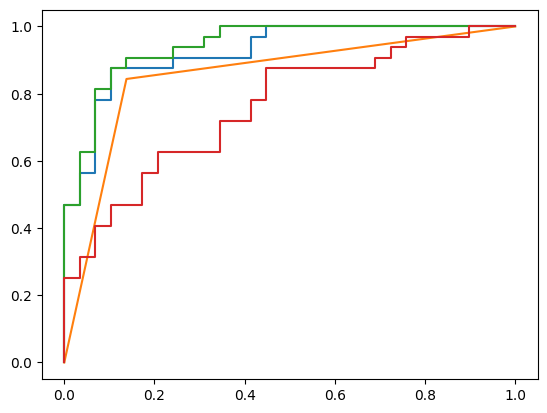

In [17]:
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(f"---- {name} ----")
    print(classification_report(y_test, preds))
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    print("ROC-AUC:", auc)
    fpr, tpr,_ = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

C:\Users\mohamed ezzat\AppData\Local\Temp\ipykernel_13684\3224769645.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


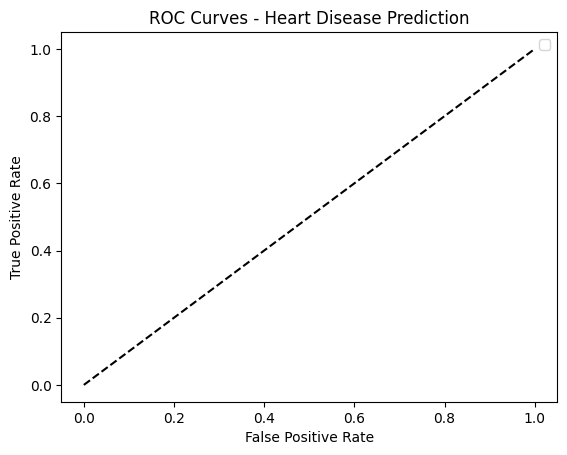

In [19]:
plt.plot([0,1], [0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Heart Disease Prediction")
plt.legend()
plt.show()